In [290]:
#Here we are importing all the nessesary packages for the assignment
import numpy as np
from math import comb
import matplotlib.pyplot as plt

In [291]:
#Here is the generic weights function given in class
def weightsfunc(n,xvaluelist):
    lambaj = []
    for i in range(n):
        prelamba = []
        for j in range(n):
            if j != i:
                prelamba.append(xvaluelist[i] - xvaluelist[j])
        #Here we multiply all the Xjs minus Xks to get the inverse of lambda
        invlambaj = np.prod(prelamba)
        #He we calulate lambda
        lambaj.append( 1 / invlambaj)
    return lambaj
    


In [292]:
#Here is the formula code for the Barycentric Formula
def barypoly(x,n,weightslist,xvaluelist,fvaluelist):
    toppieces = []
    bottompieces = []
    for i in range(n):
        #We want to calculate the top and bottom summations seperatley
        toppiece = (fvaluelist[i]*weightslist[i]) / (x - xvaluelist[i] + 0.00000000000000001)
        toppieces.append(toppiece)
        bottompiece = weightslist[i] / (x - xvaluelist[i] + 0.00000000000000001)
        bottompieces.append(bottompiece)
    top = sum(toppieces)
    bottom = sum(bottompieces)
    output = top / bottom
    return output

In [293]:
#Here is the given table in 2B
numberofpoints = 6
xvalues = [0,0.25,0.5,0.75,1.25,1.5]
fvalues = [0,0.7071,1,0.7071,-0.7071,-1]

In [294]:
#Here we use the weight function anf the barycentric formua to calculate the
#interpolating polynomial for the given points
P5_2 = barypoly(2,numberofpoints,weightsfunc(numberofpoints,xvalues),xvalues,fvalues)

In [295]:
#Here is the approximation for x = 2 given the points
P5_2

0.8519999999999989

In [296]:
#Here are the x values, the equidistrubted nodes on the domain [-5,5]
#And also the f values for the function 1/(1 + x^2)
def rungevaluesa(n):
    rungexvalues = []
    rungefvalues = []
    for i in range(n + 1):
        rungexvalues.append(( -5 + i * (10 / (n))))
        f = 1 / (1 + rungexvalues[i]**2)
        rungefvalues.append(f)
    
    return [rungexvalues,rungefvalues]   

In [297]:
#Here is the given formula for the weights of equidistributed nodes
def weightedvalueseq(n,xvalues,fvalues):
    output = []
    for i in range(n + 1):
        values = (-1)**i * comb(n,i)
        output.append(values)
    return output

In [304]:
#Here is the plotting function with 5000 points of the interpolated polynomial
def plotinterp(n,w,x,f):
    number = 5000
    plotpoints = []
    inputlist = []
    for i in range(number):
        inpt = -5 + i * (10 / (number - 1))
        inputlist.append(inpt)
        plotpoints.append(barypoly(inpt,n,w,x,f))

    plt.plot(inputlist,plotpoints, label= n)
    plt.ylim(-0.5,1.5)
    plt.xlim(-5,5)
    plt.legend()

In [324]:
#Here we calculate the plots for different n values 4,8,12
#aka the different amount of points we get from our function
def answertoA():
    for element in [4,8,12]:
        w = weightedvalueseq(element,rungevaluesa(element)[0],rungevaluesa(element)[1])
        x = rungevaluesa(element)[0]
        f = rungevaluesa(element)[1]
        plotinterp(element,w,x,f)
        
    #Here we plot the true function to show that our approximation is 
    #approaching the true function as n increases  
    a = np.linspace(-5,5,100)
    b = 1 / (1 + a**2)
    plt.plot(a,b, label = 'True Func')
    plt.legend()

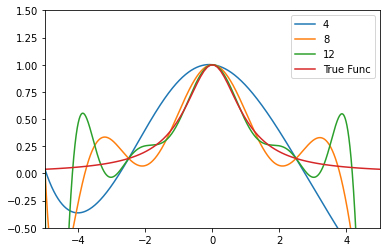

In [325]:
#The plots are shown here
answertoA()

In [307]:
#Here are the x values, the periodic nodes on the domain [-5,5]
#And also the f values for the function 1/(1 + x^2)
def rungevaluesb(n):
    rungexvalues = []
    rungefvalues = []
    for i in range(n + 1):
        rungexvalues.append(5*np.cos(i * np.pi / n))
        f = 1 / (1 + rungexvalues[i]**2)
        rungefvalues.append(f)
    
    return [rungexvalues,rungefvalues]
  

In [308]:
#Here is the given formula for the weights of periodic nodes
def weightscos(n,xvalues,fvalues):
    output = []
    for i in range(n+1):
        if i == 0 or i == n:
            values = 0.5*(-1)**i
            output.append(values)
        else:
            values = (-1)**i
            output.append(values)
            
    return output
    
    

In [326]:
#Here we calculate the plots for different n values 4, 8 , 12, 100
#aka the different amount of points we get from our function
def answertoB():
    for element in [4,8,12,100]:
        w2 = weightscos(element,rungevaluesb(element)[0],rungevaluesb(element)[1])
        x2 = rungevaluesb(element)[0]
        f2 = rungevaluesb(element)[1]
        plotinterp(element,w2,x2,f2)
        
    #Here we plot the true function to show that our approximation is 
    #approaching the true function as n increases  
    a = np.linspace(-5,5,100)
    b = 1 / (1 + a**2)
    plt.plot(a,b, label = 'True Func')
    plt.legend()

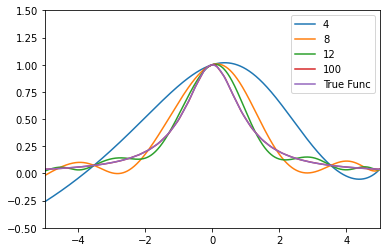

In [327]:
#Here we have the plots
answertoB()

In [311]:
#Here are the x values, the equidistrubted nodes on the domain [-5,5]
#And also the f values for the function e^(-x^2/5)
def rungevaluesc(n):
    rungexvalues = []
    rungefvalues = []
    for i in range(n + 1):
        rungexvalues.append(( -5 + i * (10 / (n))))
        f = np.exp(-1 * (rungexvalues[i]**2)/5)
        rungefvalues.append(f)
    
    return [rungexvalues,rungefvalues]
    

In [328]:
#Here we calculate the plots for different n values 4, 8 , 12
#aka the different amount of points we get from our function
def answertoC():
    for element in [4,8,12]:
        w3 = weightedvalueseq(element,rungevaluesc(element)[0],rungevaluesc(element)[1])
        x3 = rungevaluesc(element)[0]
        f3 = rungevaluesc(element)[1]
        plotinterp(element,w3,x3,f3)
        
    #Here we plot the true function to show that our approximation is 
    #approaching the true function as n increases  
    a = np.linspace(-5,5,100)
    b = np.exp(-1*(a**2/5))
    plt.plot(a,b, label = 'True Func')
    plt.legend()

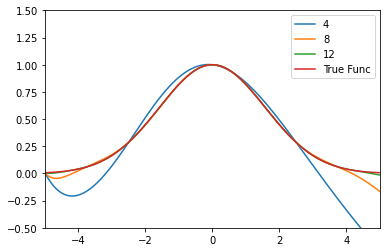

In [329]:
#Here we have the approximate plots
answertoC()